# Cargar datos

In [191]:
import pandas as pd

df_isomor = pd.read_csv("isomorphic_groups3.csv", sep=";")

df_class = pd.read_csv("clasificacion_resultados2.csv")

In [192]:
df_class["ID"] -= 1
df_class

,ID,Clasificación,Oración
0,0,Compleja,Además se le pediría a las empresas interesada...
1,1,Compuesta-Compleja,Producto del fin del imperio y las invasiones ...
2,2,Compleja,"MADRID, 3 (EUROPA PRESS) Las tenistas española..."
3,3,Compleja,Los pacientes con diabetes son cuatro veces má...
4,4,Simple,Aclarando hacia todo el mundo Valderrama Y Edu...
...,...,...,...
14182,14182,Simple,San Julián de Morcelle (en gallego: San Xulián...
14183,14183,Compuesta-Compleja,Una vez que el Hijo de Krypton suelta el misil...
14184,14184,Compleja,"Jazmin es todo lo contrario, es tímida y calla..."
14185,14185,Simple,Esta teoría se avenía bien con la creencia del...


In [193]:
string = "es_gsd-ud-train_{}.graphml"
df_class["filename"] = df_class["ID"].apply(lambda x: string.format(x))
df_class

,ID,Clasificación,Oración,filename
0,0,Compleja,Además se le pediría a las empresas interesada...,es_gsd-ud-train_0.graphml
1,1,Compuesta-Compleja,Producto del fin del imperio y las invasiones ...,es_gsd-ud-train_1.graphml
2,2,Compleja,"MADRID, 3 (EUROPA PRESS) Las tenistas española...",es_gsd-ud-train_2.graphml
3,3,Compleja,Los pacientes con diabetes son cuatro veces má...,es_gsd-ud-train_3.graphml
4,4,Simple,Aclarando hacia todo el mundo Valderrama Y Edu...,es_gsd-ud-train_4.graphml
...,...,...,...,...
14182,14182,Simple,San Julián de Morcelle (en gallego: San Xulián...,es_gsd-ud-train_14182.graphml
14183,14183,Compuesta-Compleja,Una vez que el Hijo de Krypton suelta el misil...,es_gsd-ud-train_14183.graphml
14184,14184,Compleja,"Jazmin es todo lo contrario, es tímida y calla...",es_gsd-ud-train_14184.graphml
14185,14185,Simple,Esta teoría se avenía bien con la creencia del...,es_gsd-ud-train_14185.graphml


In [194]:
desc = df_class.groupby("Clasificación").size().reset_index(name='counts')
desc["%"] = desc["counts"] / desc["counts"].sum() * 100
desc

,Clasificación,counts,%
0,Compleja,6309,44.470290
1,Compuesta,666,4.694439
2,Compuesta-Compleja,1898,13.378445
3,Indeterminada (múltiples verbos sin subordinac...,1290,9.092831
4,Simple,4024,28.363995


# Generate DDBB format for isomorphic groups

In [195]:
import csv
from pathlib import Path

def explode(in_csv: Path, out_csv: Path):
    out_rows = []
    with in_csv.open(newline='', encoding='utf-8') as f:
        reader = csv.DictReader(f, delimiter=';')
        for row in reader:
            sig = row.get('signature') or row.get('wl_signature')
            cls_size = int(row['count'])
            # files are pipe-separated, possibly quoted
            files = row['files'].strip().strip('"').split('|')
            for fp in files:
                fp = fp.strip()
                out_rows.append({
                    'filename': Path(fp).name,
                    'filepath': fp,
                    'wl_signature': sig,
                    'class_size': cls_size,
                })

    with out_csv.open('w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=out_rows[0].keys())
        writer.writeheader()
        writer.writerows(out_rows)
        
explode(Path("isomorphic_groups3.csv"), Path("isomorphic_groups_bbdd3.csv"))

In [196]:
df_iso_groups = pd.read_csv("isomorphic_groups_bbdd3.csv")
df_iso_groups.head(10)

,filename,filepath,wl_signature,class_size
0,es_gsd-ud-train_7825.graphml,UD_Spanish-GSD/es_gsd-ud-train_7825.graphml,0:9#0:7|1:1|2:1#0:4|1:1|2:3|3:1#,5
1,es_gsd-ud-train_13319.graphml,UD_Spanish-GSD/es_gsd-ud-train_13319.graphml,0:9#0:7|1:1|2:1#0:4|1:1|2:3|3:1#,5
2,es_gsd-ud-train_6750.graphml,UD_Spanish-GSD/es_gsd-ud-train_6750.graphml,0:9#0:7|1:1|2:1#0:4|1:1|2:3|3:1#,5
3,es_gsd-ud-train_4447.graphml,UD_Spanish-GSD/es_gsd-ud-train_4447.graphml,0:9#0:7|1:1|2:1#0:4|1:1|2:3|3:1#,5
4,es_gsd-ud-train_5637.graphml,UD_Spanish-GSD/es_gsd-ud-train_5637.graphml,0:9#0:7|1:1|2:1#0:4|1:1|2:3|3:1#,5
5,es_gsd-ud-train_12948.graphml,UD_Spanish-GSD/es_gsd-ud-train_12948.graphml,0:19#0:13|1:1|2:3|3:2#0:5|1:1|2:3|3:1|4:5|5:1|...,1
6,es_gsd-ud-train_9745.graphml,UD_Spanish-GSD/es_gsd-ud-train_9745.graphml,0:24#0:15|1:3|2:3|3:1|4:2#0:3|1:1|2:5|3:1|4:1|...,1
7,es_gsd-ud-train_3290.graphml,UD_Spanish-GSD/es_gsd-ud-train_3290.graphml,0:37#0:24|1:1|2:4|3:5|4:2|5:1#0:10|1:1|2:4|3:6...,1
8,es_gsd-ud-train_1588.graphml,UD_Spanish-GSD/es_gsd-ud-train_1588.graphml,0:50#0:32|1:6|2:4|3:1|4:1|5:3|6:3#0:12|1:2|2:1...,1
9,es_gsd-ud-train_12830.graphml,UD_Spanish-GSD/es_gsd-ud-train_12830.graphml,0:47#0:30|1:4|2:6|3:4|4:3#0:13|1:7|2:2|3:2|4:1...,1


In [208]:
df_iso_groups[df_iso_groups["filename"] == "es_gsd-ud-train_7626.graphml"]["wl_signature"].values[0] == df_iso_groups[df_iso_groups["filename"] == "es_gsd-ud-train_8960.graphml"]["wl_signature"].values[0]

False

In [210]:
df_iso_groups[df_iso_groups["filename"] == "es_gsd-ud-train_8960.graphml"]["wl_signature"].values[0]

'0:9#0:4|1:2|2:3#0:3|1:1|2:1|3:1|4:1|5:1|6:1#0:2|1:1|2:1|3:1|4:1|5:1|6:1|7:1#'

In [199]:
join_df = df_iso_groups.merge(df_class, left_on="filename", right_on="filename", how="inner")
join_df = join_df.drop(columns=["filepath"])
join_df.head(10)

,filename,wl_signature,class_size,ID,Clasificación,Oración
0,es_gsd-ud-train_7825.graphml,0:9#0:7|1:1|2:1#0:4|1:1|2:3|3:1#,5,7825,Simple,Nasija es una película del año 2006.
1,es_gsd-ud-train_13319.graphml,0:9#0:7|1:1|2:1#0:4|1:1|2:3|3:1#,5,13319,Compuesta,Nosotros lo hemos hecho y lo hemos entendido.
2,es_gsd-ud-train_6750.graphml,0:9#0:7|1:1|2:1#0:4|1:1|2:3|3:1#,5,6750,Simple,Dadichi fue un personaje de la mitología hindu...
3,es_gsd-ud-train_4447.graphml,0:9#0:7|1:1|2:1#0:4|1:1|2:3|3:1#,5,4447,Simple,Es una especie rara en la vida silvestre.
4,es_gsd-ud-train_5637.graphml,0:9#0:7|1:1|2:1#0:4|1:1|2:3|3:1#,5,5637,Simple,Fue la única mexicana entre las cinco grandes.
5,es_gsd-ud-train_12948.graphml,0:19#0:13|1:1|2:3|3:2#0:5|1:1|2:3|3:1|4:5|5:1|...,1,12948,Compleja,"Se alimenta de insectos, que busca entre las h..."
6,es_gsd-ud-train_9745.graphml,0:24#0:15|1:3|2:3|3:1|4:2#0:3|1:1|2:5|3:1|4:1|...,1,9745,Compleja,Aunque los tres distritos de las Azores y el M...
7,es_gsd-ud-train_3290.graphml,0:37#0:24|1:1|2:4|3:5|4:2|5:1#0:10|1:1|2:4|3:6...,1,3290,Compleja,"A cambio de su capital y el riesgo, exigía nad..."
8,es_gsd-ud-train_1588.graphml,0:50#0:32|1:6|2:4|3:1|4:1|5:3|6:3#0:12|1:2|2:1...,1,1588,Compleja,En el pasado se produjo un hundimiento del ter...
9,es_gsd-ud-train_12830.graphml,0:47#0:30|1:4|2:6|3:4|4:3#0:13|1:7|2:2|3:2|4:1...,1,12830,Compleja,"En sus palabras, el embajador de Viet Nam en e..."


In [200]:
join_df.groupby("wl_signature").agg(diferentes=("Clasificación","nunique"), size_group=("filename", "count")).reset_index().sort_values("diferentes", ascending=False).head(20)

,wl_signature,diferentes,size_group
12334,0:7#0:5|1:1|2:1#0:3|1:1|2:2|3:1#,4,16
12502,0:8#0:5|1:1|2:1|3:1#0:1|1:1|2:2|3:1|4:2|5:1#,4,7
292,0:11#0:7|1:1|2:1|3:2#0:2|1:1|2:1|3:4|4:1|5:1|6...,4,7
12519,0:8#0:6|1:2#,4,11
533,0:12#0:7|1:2|2:1|3:2#0:1|1:2|2:1|3:4|4:1|5:1|6...,3,3
297,0:11#0:7|1:1|2:1|3:2#0:4|1:1|2:1|3:2|4:1|5:1|6...,3,5
31,0:10#0:2|1:6|2:2#0:2|1:4|2:2|3:2#,3,3
12661,0:9#0:6|1:2|2:1#0:4|1:2|2:2|3:1#,3,12
12006,0:6#0:4|1:2#,3,32
12005,0:6#0:4|1:1|2:1#0:3|1:1|2:1|3:1#,3,18


In [201]:
out = (join_df.pivot_table(columns='Clasificación',
                           index='wl_signature',
                      aggfunc='size',  # count rows per value
                      fill_value=0)
         ).reset_index().rename_axis(None, axis=1)
out

,wl_signature,Compleja,Compuesta,Compuesta-Compleja,Indeterminada (múltiples verbos sin subordinación/coordinación clara),Simple
0,0:10#0:1|1:5|2:1|3:3#0:1|1:2|2:1|3:3|4:3#,1,0,0,0,0
1,0:10#0:1|1:6|2:1|3:2#0:1|1:1|2:1|3:1|4:4|5:2#,0,0,0,0,1
2,0:10#0:1|1:6|2:1|3:2#0:1|1:1|2:2|3:1|4:3|5:1|6...,1,0,0,0,3
3,0:10#0:1|1:6|2:1|3:2#0:1|1:3|2:3|3:1|4:1|5:1#0...,0,0,0,0,1
4,0:10#0:1|1:6|2:2|3:1#0:1|1:1|2:2|3:1|4:1|5:3|6...,1,0,0,0,0
...,...,...,...,...,...,...
12683,0:96#0:8|1:63|2:2|3:8|4:7|5:4|6:4#0:1|1:5|2:1|...,1,0,0,0,0
12684,0:98#0:15|1:59|2:2|3:1|4:7|5:9|6:5#0:1|1:7|2:6...,1,0,0,0,0
12685,0:98#0:60|1:9|2:12|3:9|4:4|5:3|6:1#0:13|1:18|2...,0,0,1,0,0
12686,0:98#0:62|1:6|2:11|3:9|4:5|5:4|6:1#0:9|1:2|2:1...,1,0,0,0,0


In [202]:
out["group_size"] = out[out.columns[1:]].sum(axis=1).sort_values(ascending=False)
out

,wl_signature,Compleja,Compuesta,Compuesta-Compleja,Indeterminada (múltiples verbos sin subordinación/coordinación clara),Simple,group_size
0,0:10#0:1|1:5|2:1|3:3#0:1|1:2|2:1|3:3|4:3#,1,0,0,0,0,1
1,0:10#0:1|1:6|2:1|3:2#0:1|1:1|2:1|3:1|4:4|5:2#,0,0,0,0,1,1
2,0:10#0:1|1:6|2:1|3:2#0:1|1:1|2:2|3:1|4:3|5:1|6...,1,0,0,0,3,4
3,0:10#0:1|1:6|2:1|3:2#0:1|1:3|2:3|3:1|4:1|5:1#0...,0,0,0,0,1,1
4,0:10#0:1|1:6|2:2|3:1#0:1|1:1|2:2|3:1|4:1|5:3|6...,1,0,0,0,0,1
...,...,...,...,...,...,...,...
12683,0:96#0:8|1:63|2:2|3:8|4:7|5:4|6:4#0:1|1:5|2:1|...,1,0,0,0,0,1
12684,0:98#0:15|1:59|2:2|3:1|4:7|5:9|6:5#0:1|1:7|2:6...,1,0,0,0,0,1
12685,0:98#0:60|1:9|2:12|3:9|4:4|5:3|6:1#0:13|1:18|2...,0,0,1,0,0,1
12686,0:98#0:62|1:6|2:11|3:9|4:5|5:4|6:1#0:9|1:2|2:1...,1,0,0,0,0,1


In [203]:
for c in out.columns[1:-1]:
    out[c] = out[c]/out["group_size"]
    
out

,wl_signature,Compleja,Compuesta,Compuesta-Compleja,Indeterminada (múltiples verbos sin subordinación/coordinación clara),Simple,group_size
0,0:10#0:1|1:5|2:1|3:3#0:1|1:2|2:1|3:3|4:3#,1.00,0.0,0.0,0.0,0.00,1
1,0:10#0:1|1:6|2:1|3:2#0:1|1:1|2:1|3:1|4:4|5:2#,0.00,0.0,0.0,0.0,1.00,1
2,0:10#0:1|1:6|2:1|3:2#0:1|1:1|2:2|3:1|4:3|5:1|6...,0.25,0.0,0.0,0.0,0.75,4
3,0:10#0:1|1:6|2:1|3:2#0:1|1:3|2:3|3:1|4:1|5:1#0...,0.00,0.0,0.0,0.0,1.00,1
4,0:10#0:1|1:6|2:2|3:1#0:1|1:1|2:2|3:1|4:1|5:3|6...,1.00,0.0,0.0,0.0,0.00,1
...,...,...,...,...,...,...,...
12683,0:96#0:8|1:63|2:2|3:8|4:7|5:4|6:4#0:1|1:5|2:1|...,1.00,0.0,0.0,0.0,0.00,1
12684,0:98#0:15|1:59|2:2|3:1|4:7|5:9|6:5#0:1|1:7|2:6...,1.00,0.0,0.0,0.0,0.00,1
12685,0:98#0:60|1:9|2:12|3:9|4:4|5:3|6:1#0:13|1:18|2...,0.00,0.0,1.0,0.0,0.00,1
12686,0:98#0:62|1:6|2:11|3:9|4:5|5:4|6:1#0:9|1:2|2:1...,1.00,0.0,0.0,0.0,0.00,1


In [204]:
out.sort_values("group_size", ascending=False, inplace=True)

In [205]:
out

,wl_signature,Compleja,Compuesta,Compuesta-Compleja,Indeterminada (múltiples verbos sin subordinación/coordinación clara),Simple,group_size
11419,0:5#0:3|1:1|2:1#0:2|1:1|2:1|3:1#,0.000000,0.0,0.0,0.065217,0.934783,46
4387,0:21#0:14|1:3|2:1|3:3#0:6|1:2|2:3|3:1|4:1|5:5|...,0.000000,0.0,0.0,0.000000,1.000000,36
921,0:13#0:8|1:2|2:2|3:1#0:2|1:4|2:1|3:2|4:1|5:1|6...,0.000000,0.0,0.0,0.090909,0.909091,33
12006,0:6#0:4|1:2#,0.031250,0.0,0.0,0.125000,0.843750,32
10103,0:4#0:2|1:2#,0.037037,0.0,0.0,0.000000,0.962963,27
...,...,...,...,...,...,...,...
4422,0:21#0:15|1:2|2:1|3:1|4:1|5:1#0:3|1:1|2:6|3:4|...,0.000000,0.0,0.0,0.000000,1.000000,1
4423,0:21#0:15|1:2|2:1|3:1|4:1|5:1#0:4|1:1|2:2|3:1|...,0.000000,0.0,0.0,1.000000,0.000000,1
4424,0:21#0:15|1:2|2:1|3:1|4:2#0:8|1:3|2:1|3:1|4:1|...,0.000000,0.0,0.0,0.000000,1.000000,1
4425,0:21#0:15|1:2|2:1|3:2|4:1#0:4|1:8|2:1|3:1|4:1|...,1.000000,0.0,0.0,0.000000,0.000000,1


In [206]:
cols = ['Compleja','Compuesta','Compuesta-Compleja','Indeterminada (múltiples verbos sin subordinación/coordinación clara)', "Simple"]

# 1) Range (peak-to-peak)
import numpy as np
    
out_filtered = out[out["group_size"] > 1]
out_filtered['spread'] = out_filtered[cols].to_numpy().ptp(axis=1)          # same as max-min

# 2) Standard deviation (population)
out_filtered['row_std'] = out_filtered[cols].std(axis=1, ddof=0)

# 3) Mean absolute deviation
m = out_filtered[cols].mean(axis=1)
out_filtered['mad'] = (out_filtered[cols].sub(m, axis=0)).abs().mean(axis=1)

# Get the rows with the tightest values
tight_rows = out_filtered.sort_values(['group_size','spread'], ascending=[False, True]).head(20)  # or use 'row_std' / 'mad'
tight_rows

/var/folders/rn/46s8dp4j7zng96g_212pqjlh0000gp/T/ipykernel_60134/2934903349.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_filtered['spread'] = out_filtered[cols].to_numpy().ptp(axis=1)          # same as max-min
/var/folders/rn/46s8dp4j7zng96g_212pqjlh0000gp/T/ipykernel_60134/2934903349.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_filtered['row_std'] = out_filtered[cols].std(axis=1, ddof=0)
/var/folders/rn/46s8dp4j7zng96g_212pqjlh0000gp/T/ipykernel_60134/2934903349.py:14: SettingWithCo

,wl_signature,Compleja,Compuesta,Compuesta-Compleja,Indeterminada (múltiples verbos sin subordinación/coordinación clara),Simple,group_size,spread,row_std,mad
11419,0:5#0:3|1:1|2:1#0:2|1:1|2:1|3:1#,0.000000,0.000000,0.0,0.065217,0.934783,46,0.934783,0.368259,0.293913
4387,0:21#0:14|1:3|2:1|3:3#0:6|1:2|2:3|3:1|4:1|5:5|...,0.000000,0.000000,0.0,0.000000,1.000000,36,1.000000,0.400000,0.320000
921,0:13#0:8|1:2|2:2|3:1#0:2|1:4|2:1|3:2|4:1|5:1|6...,0.000000,0.000000,0.0,0.090909,0.909091,33,0.909091,0.356289,0.283636
12006,0:6#0:4|1:2#,0.031250,0.000000,0.0,0.125000,0.843750,32,0.843750,0.325120,0.257500
10103,0:4#0:2|1:2#,0.037037,0.000000,0.0,0.000000,0.962963,27,0.962963,0.381751,0.305185
1831,0:16#0:10|1:1|2:1|3:4#0:7|1:1|2:1|3:1|4:2|5:2|...,0.000000,0.000000,0.0,0.000000,1.000000,24,1.000000,0.400000,0.320000
12505,0:8#0:5|1:1|2:1|3:1#0:2|1:1|2:2|3:1|4:1|5:1#,0.043478,0.000000,0.0,0.173913,0.782609,23,0.782609,0.298199,0.233043
1872,0:16#0:10|1:1|2:5#0:8|1:1|2:2|3:2|4:2|5:1#0:2|...,0.000000,0.000000,0.0,0.000000,1.000000,23,1.000000,0.400000,0.320000
12332,0:7#0:5|1:1|2:1#0:2|1:1|2:3|3:1#,0.000000,0.000000,0.0,0.095238,0.904762,21,0.904762,0.354306,0.281905
12336,0:7#0:5|1:1|2:1#0:4|1:1|2:1|3:1#,0.157895,0.000000,0.0,0.105263,0.736842,19,0.736842,0.275299,0.214737


In [211]:
join_df[join_df["wl_signature"] == '0:9#0:4|1:2|2:3#0:3|1:1|2:1|3:1|4:1|5:1|6:1#0:2|1:1|2:1|3:1|4:1|5:1|6:1|7:1#']

,filename,wl_signature,class_size,ID,Clasificación,Oración
3634,es_gsd-ud-train_8960.graphml,0:9#0:4|1:2|2:3#0:3|1:1|2:1|3:1|4:1|5:1|6:1#0:...,1,8960,Compleja,Las regiones fértiles soportan conceptaculos l...


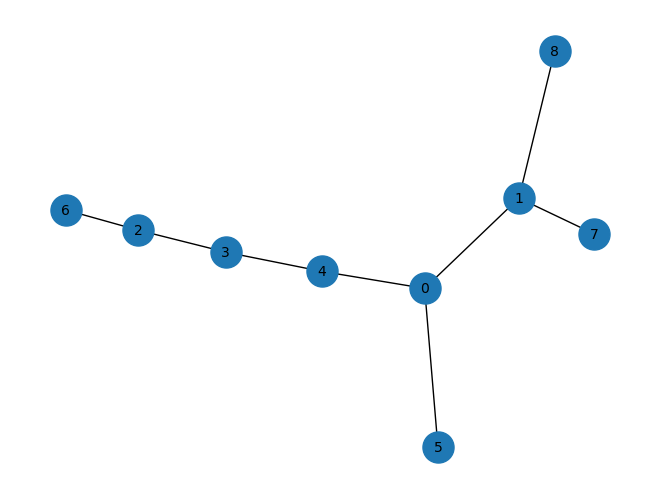

In [189]:
import networkx as nx
G1 = nx.convert_node_labels_to_integers(nx.read_graphml("UD_Spanish-GSD/es_gsd-ud-train_8960.graphml").to_undirected(), ordering="decreasing degree")
nx.draw(G1, with_labels=True, node_size=500, font_size=10)

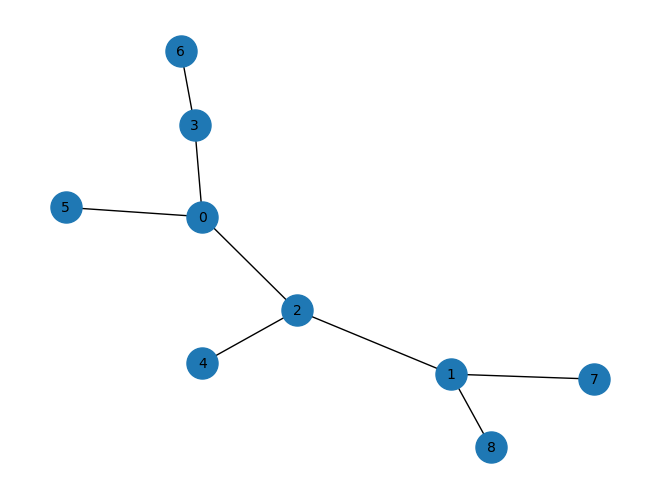

In [112]:
G2 = nx.convert_node_labels_to_integers(nx.read_graphml("UD_Spanish-GSD/es_gsd-ud-train_7927.graphml").to_undirected(), ordering="decreasing degree")
nx.draw(G2, with_labels=True, node_size=500, font_size=10)

In [169]:
from __future__ import annotations
from pathlib import Path
from collections import defaultdict
from collections import Counter
import copy

# ---------- WL over trees ----------
def wl_tree_signature(G: nx.Graph) -> str:
    """
    1-WL color refinement on an (unlabeled) tree G.
    Returns a canonical signature string usable as a dict key.
    """
    # Relabel to 0..n-1 for array-friendly processing
    G = nx.relabel.convert_node_labels_to_integers(G, ordering="sorted")  # keeps attrs by default
    n = G.number_of_nodes()

    # adjacency as list of lists for speed
    adj = [list(G.neighbors(v)) for v in range(n)]  # neighbors() yields iterator.  [oai_citation:6‡networkx.org](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html?utm_source=chatgpt.com)
    colors = [0] * n
    tmp = [None] * n
    i = 0
    signature = ""
    while True:      
        hist = defaultdict(int)
        for c in colors:
            hist[c] += 1
        signature+= "|".join(f"{c}:{hist[c]}" for c in sorted(hist))
        signature += ";"
        for v in range(n):
            neigh_cols = sorted(colors[u] for u in adj[v])
            tmp[v] = str(colors[v]) +"_"+ str(tuple(neigh_cols))
        # compress tuples → small ints
        mapping = {}
        next_c = 0
        new_colors = [0] * n
        for v in range(n):
            key = tmp[v]
            #print(f"key is {key}")
            if key not in mapping:
                mapping[key] = next_c
                next_c += 1
            new_colors[v] = mapping[key]
        if new_colors == colors:
            break
        colors = new_colors
        i+=1

    return signature


In [161]:
def wl_tree_signature_strong(G: nx.Graph) -> str:
    # 1) Normalize the graph
    G = nx.Graph(G)  # ensure undirected/simple
    G = nx.relabel.convert_node_labels_to_integers(G, ordering="sorted")

    n = G.number_of_nodes()
    adj = [list(G.neighbors(v)) for v in range(n)]
    colors = [0] * n
    tmp = [None] * n
    i = 0
    while True:
        print(f"iteration {i}")
        for v in range(n):
            neigh_cols = sorted(colors[u] for u in adj[v])
            tmp[v] = str(colors[v]) + str(tuple(neigh_cols))
        mapping = {}
        next_c = 0
        new_colors = [0] * n
        for v in range(n):
            key = tmp[v]
            if key not in mapping:
                mapping[key] = next_c
                next_c += 1
            new_colors[v] = mapping[key]
        if new_colors == colors:
            break
        colors = new_colors
        i += 1
    # Strong signature: ordered vector of colors (no histogram)
    return ','.join(map(str, colors))

In [173]:
wl_tree_signature(G1)==wl_tree_signature(G2)

False

In [171]:
wl_tree_signature(G2)

'0:9;0:3|1:1|2:5;0:1|1:1|2:1|3:1|4:4|5:1;0:1|1:1|2:1|3:1|4:1|5:1|6:1|7:2;'

In [172]:
sorted(dict(G1.degree()).values()) == sorted(dict(G2.degree()).values())

False